In [1]:
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import timeit

We study a 7-d yeast glycolysis oscillator model

![cartoon](https://ars.els-cdn.com/content/image/1-s2.0-S0301462203001911-gr1.jpg)

The model is due to
* [Daniels & Nemenman, 2015](https://journals.plos.org/plosone/article?id=10.1371/journal.pone.0119821)
* [Ruoff, Christensen, Wolf, and Heinrich, 2003](https://www.sciencedirect.com/science/article/pii/S0301462203001911)

![ode](https://journals.plos.org/plosone/article/file?type=thumbnail&id=info:doi/10.1371/journal.pone.0119821.e033)

In [9]:
# save the data to disk

with open('gly_data.npy', 'wb') as file:
    np.save(file, gly_data)

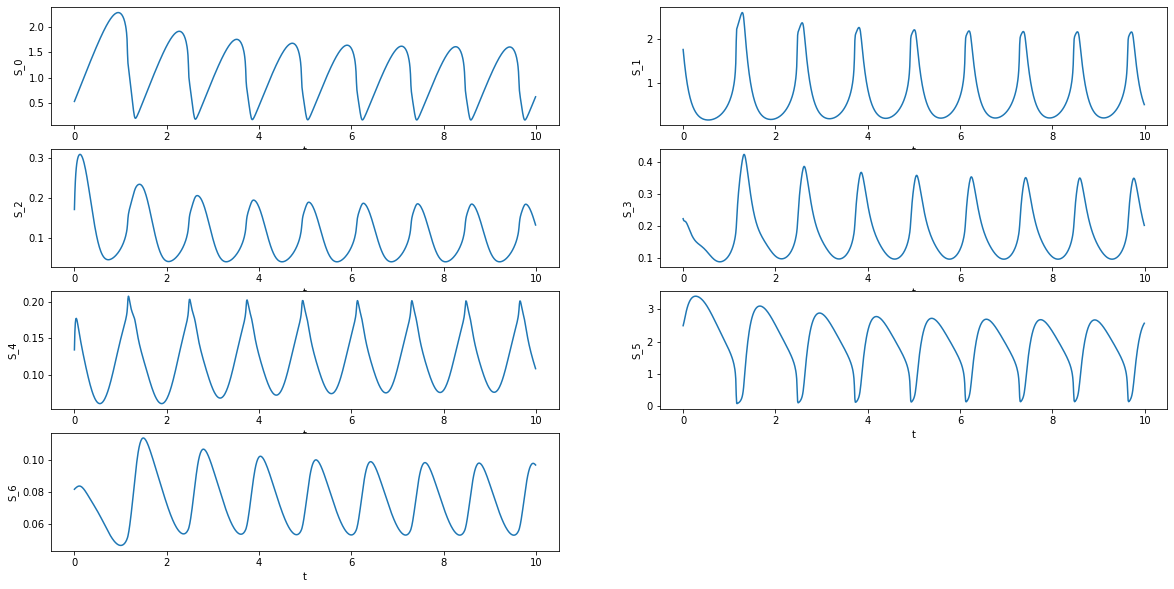

In [9]:
time_measurements = np.arange(start_time, end_time, step * sampling_rate)

plt.figure(figsize=(20, 10))
for species in range(7):
    plt.subplot(4,2,species + 1)
    plt.plot(time_measurements, gly_data[:,species])
    plt.xlabel('t')
    plt.ylabel('S_' + str(species))

In [10]:
# sanity checks
print("(noisy) Integrated vs Original")
print(gly_data[0,:])
print(x_init) # should be the same up to noise

print("Measurement interval")
print(time_measurements[sampling_rate] - time_measurements[0], step)

(noisy) Integrated vs Original
[0.52543102 1.76235457 0.17159621 0.22317309 0.13453741 2.49366703
 0.08154721]
[0.52543102 1.76235457 0.17159621 0.22317309 0.13453741 2.49366703
 0.08154721]
Measurement interval
0.01 0.01


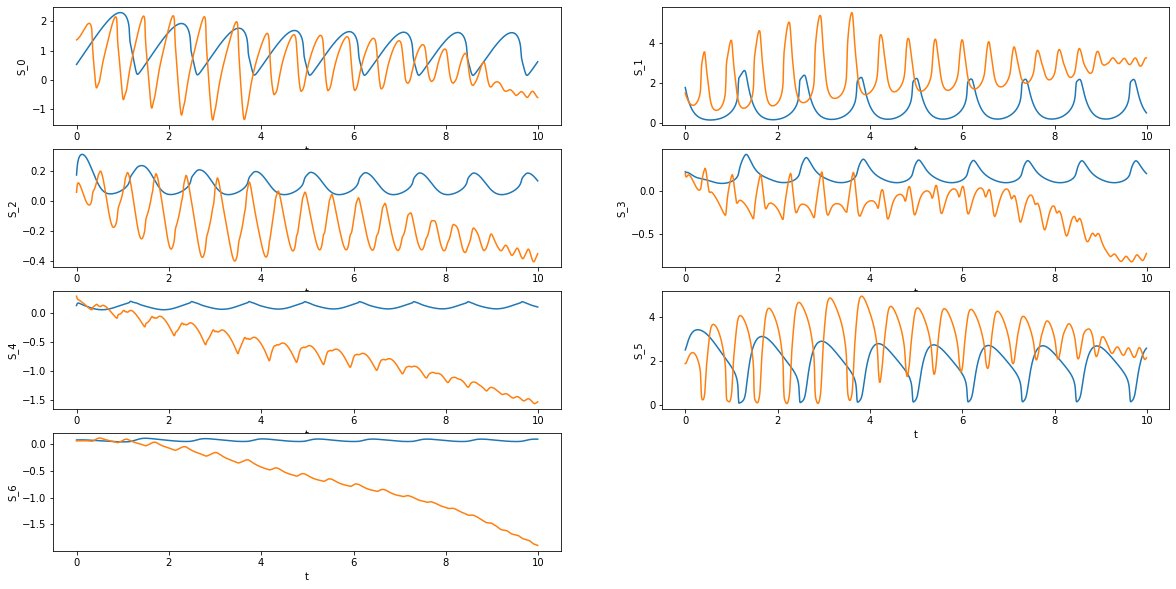

In [11]:
with open('gly_pred.npy', 'rb') as file:
    gly_pred = np.load(file)
    
plt.figure(figsize=(20, 10))
for species in range(7):
    plt.subplot(4,2,species + 1)
    plt.plot(time_measurements, gly_data[:,species])
    plt.plot(time_measurements, gly_pred[:,species])
    plt.xlabel('t')
    plt.ylabel('S_' + str(species))